In [94]:
DATA_FOLDER = '../data/'
TTG_FOLDER = DATA_FOLDER + 'TTG TUR/'

In [95]:
%matplotlib inline

from os import listdir
import random

import matplotlib.pyplot as plt
from matplotlib.image import imread

import numpy as np
import pandas as pd

In [96]:
images = listdir(TTG_FOLDER)
images = [TTG_FOLDER + file_name for file_name in images]
few_random_imgs = random.choices(images, k=4)
few_random_imgs

['../data/TTG TUR/2018-03-15 13-28-27_SIM.jpeg',
 '../data/TTG TUR/2018-03-04 15-02-47_NAO.jpeg',
 '../data/TTG TUR/2018-03-15 15-30-02_SIM.jpeg',
 '../data/TTG TUR/2018-03-16 07-25-18_NAO.jpeg']

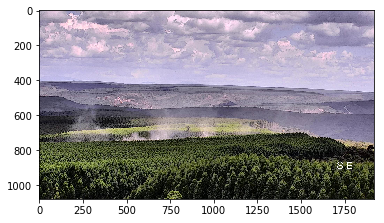

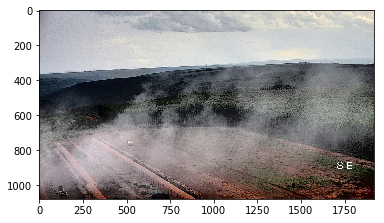

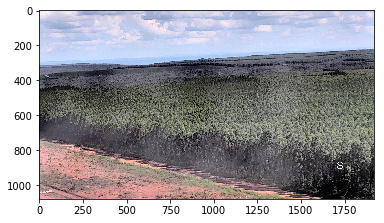

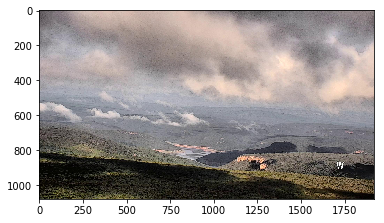

In [97]:
for img in few_random_imgs:
    plt.figure()
    plt.imshow(imread(img))

### Calculate mean intensity per image
Took 6 mins to run on my machine

In [98]:
images_info = []
for image_path in images:
    img = imread(image_path)
    img = np.array(img)
    
    mean_intensity = img.mean()
    images_info.append((image_path, mean_intensity))

In [99]:
df = pd.DataFrame(images_info, columns=['path', 'intensity'])
df.head()

path   intensity
0  ../data/TTG TUR/2017-12-12 11-53-41_SIM.jpeg  124.634896
1  ../data/TTG TUR/2017-12-12 11-54-05_NAO.jpeg  122.193911
2  ../data/TTG TUR/2017-12-12 11-54-15_SIM.jpeg  122.435058
3  ../data/TTG TUR/2017-12-12 11-55-28_SIM.jpeg  123.354838
4  ../data/TTG TUR/2017-12-12 11-56-30_NAO.jpeg  130.372939

In [100]:
df.sort_values(by=['intensity'], inplace=True)

### Darkest Hour

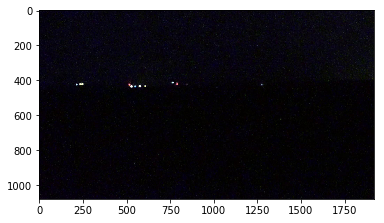

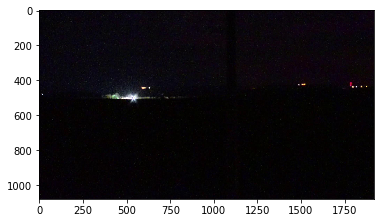

In [101]:
for img_path in df['path'].iloc[:2]:
    plt.figure()
    plt.imshow(imread(img_path))

### Lightest

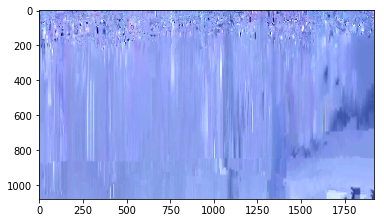

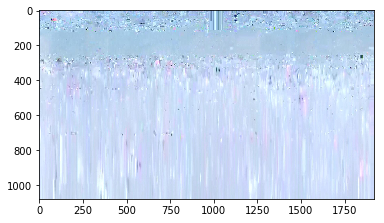

In [102]:
for img_path in df['path'].iloc[-2:]:
    plt.figure()
    plt.imshow(imread(img_path))

In [103]:
df['intensity'].describe()

count    7525.000000
mean      112.307649
std        34.842701
min         6.232230
25%       121.425421
50%       125.979163
75%       129.037464
max       217.744212
Name: intensity, dtype: float64

### Try different values for `skip_count` to find the darkest photos we can work with

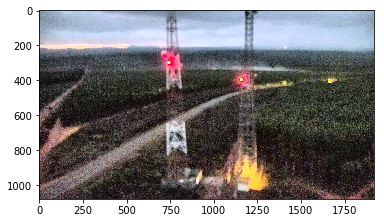

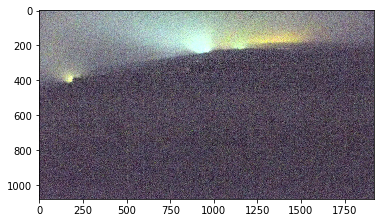

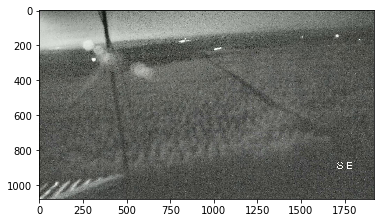

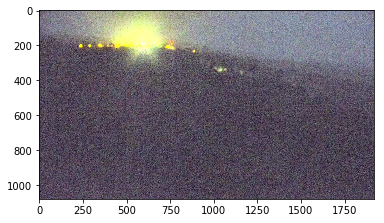

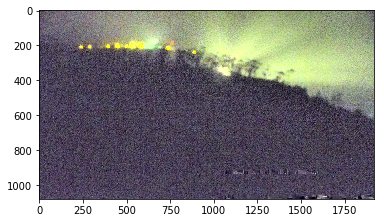

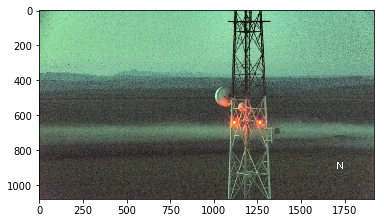

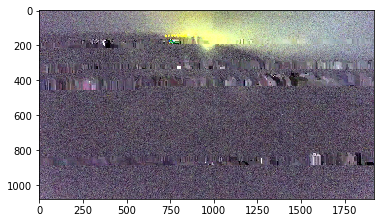

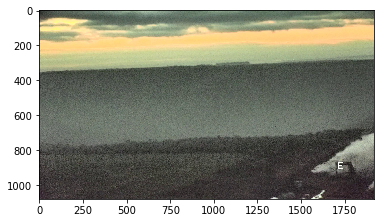

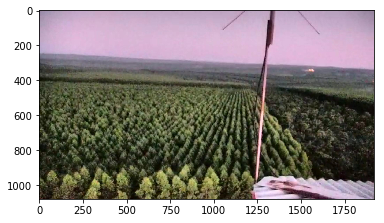

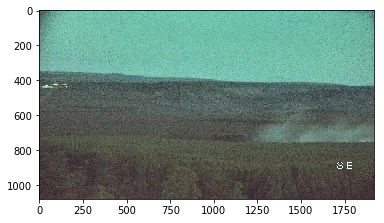

In [116]:
skip_count = 1167

for img_path in df['path'].iloc[skip_count:skip_count+10]:
    plt.figure()
    plt.imshow(imread(img_path))

### This looks like the first photo we can work with

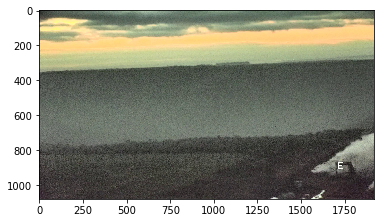

In [121]:
start_index = 1174
plt.imshow(imread(df['path'].iloc[start_index]))

In [122]:
df['intensity'].iloc[start_index]

106.40483490869342

#### min intensity is 106.4

In [123]:
daytime_df = df.iloc[start_index:]
daytime_df.shape

(6351, 2)

#### we have 6351 images

In [124]:
daytime_df['path'].to_csv(DATA_FOLDER + 'daytime_TTG_TUR_images.csv')

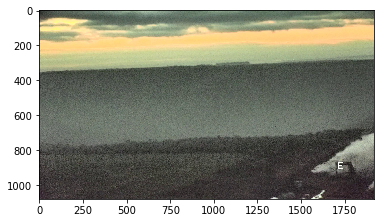

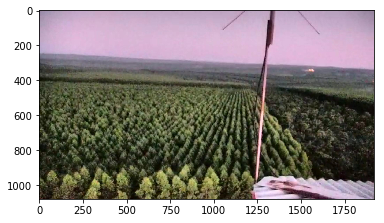

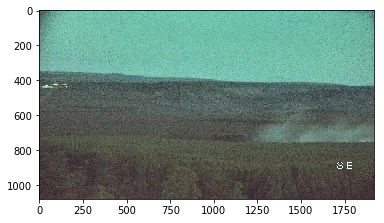

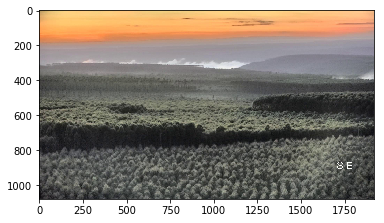

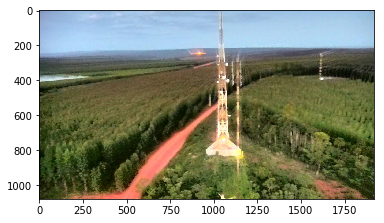

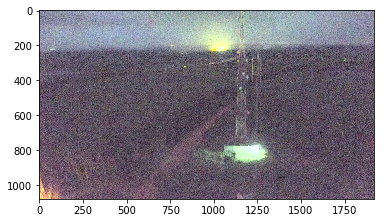

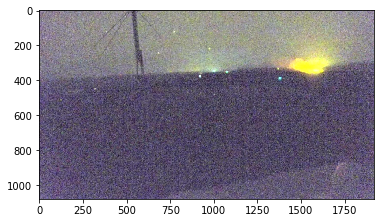

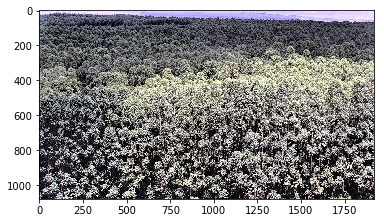

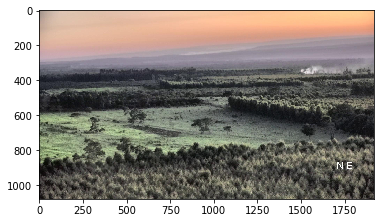

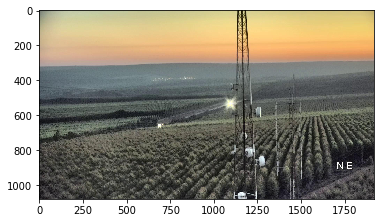

In [125]:
for img_path in df['path'].iloc[start_index:start_index+10]:
    plt.figure()
    plt.imshow(imread(img_path))